# Table of Content
### 1.  [Package and Data Loading](#PDL)
### 2.  [Data Summary in one line](#PPF)
### 3.  [Data Cleaning](#DCL)
### 4.  [Data Visualization](#DVL)
### 5.  [Decision Tree](#DT)
### 6.  [Clustering](#RS)
### 7.  [Dynamic Programming](#SM)
### 8.  [Simple Linear Regression](#SLR)
### 9.  [Word Cloud](#WC)
### 10.[Time Complexity](#TC)



#### HTML Code to increase the width of the screen

In [1]:
#expand the page layout
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Package and Data Loading
<a id="PDL"></a>

In [2]:
#import required packages
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from matplotlib import*

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg

import nltk
#nltk.download()
import re
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud
import ipywidgets as widgets
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

from scipy.cluster.vq import kmeans, vq , whiten
from sklearn import metrics

import time

from pandas import DataFrame

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from scipy.cluster.vq import vq, kmeans, whiten

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq, kmeans, whiten

import scipy as sp
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import ipywidgets as widgets
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


from copy import deepcopy
from matplotlib import pyplot as plt

import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections


import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import random
import seaborn as sns
# import shapefile as shp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import ipywidgets as widgets
import pandas as pd
import pandas_profiling
import ipywidgets as widgets

import pandas as pd
import itertools
import numpy as np
import sys
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool
from functools import partial
import random

import folium.plugins
from folium.plugins import MarkerCluster
from folium import plugins
import time
import holoviews as hv

#### Load the data 

In [3]:
#read the excel file and create dataframe
df = pd.read_csv('AB_NYC_2019.csv')

## 2.Data Summary in one line using Pandas Profiling
<a id="PPF"></a>

In [4]:
#create profile report
## User will not be able see this chart without running it
pandas_profiling.ProfileReport(df)

## 3. Data Cleaning
<a id="DCL"></a>

In [5]:
#drop columns that are not required
df = df.drop(['host_id','host_name'], axis=1)
#drop rows where null values
df = df.dropna()

## 4. Data Visualization
<a id="DVL"></a>

### Data heatmap

In [6]:
data = df.copy(deep =True)
#compute time taken
startTime=time.time()
data_heatmap = folium.Map(location=[40.64749,-73.97237], zoom_start=12)
data_heatmap.add_child(plugins.HeatMap([[row["latitude"],row["longitude"]] for name, row in data.iterrows()]))
#data_heatmap.save("D:/Purdue/01Krannert/06 MGMT 590 Computing for analytics/03 Group Project/heatmap.html") #<------- save to an html file
endTime=time.time()
time_heatmap = endTime-startTime
print(time_heatmap) #display the time 

3.331226110458374


#### required internet connection and data to look at this chart

In [7]:
## required internet connection and data to look at this chart
data_heatmap #<------- display in jupter notebook output cell

### ScatterPlot

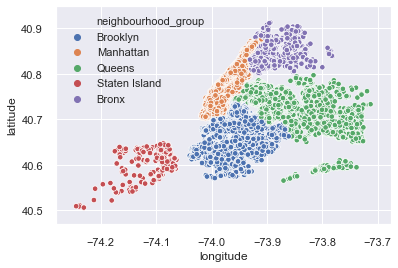

In [8]:
import time
startTime=time.time()

#plot the locations using latitude and longitude
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=30, data=data)


endTime=time.time()
time_scatterplot = endTime-startTime
#print(endTime-startTime) #display time taken to plot

# 5. Decision Tree
<a id="DT"></a>

#### Decision Tree to identify the drivers behind the Price of the Property and the success parameter

In [9]:
# preparing the data for the decision tree
start_time = time.time()

df_dtree = df.copy(deep =True)

df_dtree['flag'] = np.where(df_dtree.price>150,1,0)

df_dtree = pd.get_dummies(df_dtree, prefix=['neighbourhood','room_type'], columns =['neighbourhood','room_type'])

features = ['minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'neighbourhood_Williamsbridge', 'neighbourhood_Williamsburg',
       'neighbourhood_Willowbrook', 'neighbourhood_Windsor Terrace',
       'neighbourhood_Woodhaven', 'neighbourhood_Woodlawn',
       'neighbourhood_Woodside', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']


# calculating the model performance
X_train, X_test, y_train, y_test = train_test_split(df_dtree[features], df_dtree.flag, test_size=0.20, random_state=42)

c = tree.DecisionTreeClassifier(max_depth = 2)
c.fit(X_train,y_train)
importance = c.fit(X_train,y_train).feature_importances_
#print(dict(zip(features, importance)))

accu_train = np.sum(c.predict(X_train) == y_train)/float(y_train.size)
accu_test = np.sum(c.predict(X_test) == y_test)/float(y_test.size)

#print('Classification accuracy on train_set:{0}'.format(accu_train))
print('Classification accuracy on test_set:{0}'.format(accu_test))


# Plotting the tree to get the desired output
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(c, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


end_time = time.time()

time_decisiontree = end_time - start_time

Classification accuracy on test_set:0.7440782698249228


In [10]:
# Decision tree code that is present in the word document.
# We have commented it because the orientation of notebook is changed on running it. Fault of the package

# clas = tree.DecisionTreeClassifier(max_depth=3)
# clas.fit(X_train, y_train)

# viz = dtreeviz(clas, 
#                X_train,
#                y_train,
#                target_name='Good_or_Bad',
#                feature_names=features, 
#                class_names=["1", "0"], 
#                histtype= 'barstacked')  # barstackes is default
# viz

# 6.Clustering 
<a id='RS'></a>

#### Clustering algorithm to help Airbnb make strategy decision and have custom based marketing

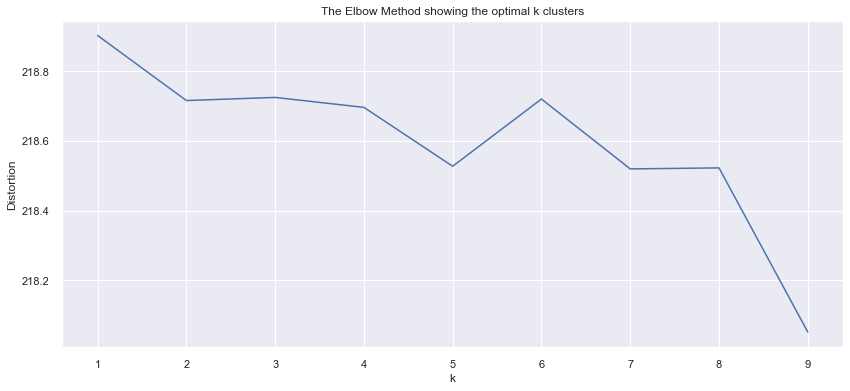

In [11]:
start_time = time.time()
# data cleaning for clustering

#read the excel file and create dataframe
df = pd.read_csv('AB_NYC_2019.csv')
df = df.drop(['host_id','host_name'], axis=1)
df = df.dropna()

df_clus = df.copy(deep = True)
df_clus = df_clus.drop(['id','latitude','longitude', 'name','neighbourhood','last_review'], axis=1)
df_clus = pd.get_dummies(df_clus, prefix=['neighbourhood_group','room_type'], columns =['neighbourhood_group','room_type'])

#try out different number of clusters for elbow plot
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(whiten(df_clus))
    kmeanModel.fit(whiten(df_clus))
    distortions.append(sum(np.min(cdist(df_clus, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clus.shape[0])

#plot the elbow chart
plt.figure(figsize =(14,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k clusters')
plt.show()


#run kmeans clustering
kmeans = KMeans(n_clusters=6).fit(whiten(df_clus))
centroids = kmeans.cluster_centers_
#print(centroids)
r = kmeans.predict(whiten(df_clus))
r = pd.DataFrame(r)
r.shape
#df_clus2 = df_clus

df_clus['clusters'] = r


df_clus_clustercolumn = pd.DataFrame(df_clus['clusters'])
df_clus2 = df.merge(df_clus)
df_columns_dp = ['id', 'name', 'latitude','longitude', 'price', 'minimum_nights', 'availability_365', 'clusters']
df_dp = df_clus2[df_columns_dp]

end_time = time.time()
time_clustering = end_time - start_time

# 7.Dynamic programming
<a id="SM"></a>

#### Dropdown for the customer to choose the best suitable places to stay.

In [12]:
#create dropodown to select from the available metrics
d = widgets.Dropdown(options=['Economic and Short Term Stay', 'Economical Long Stay', 'Expensive Long Stay','Moderately Price Short Stay',
                              'Moderately Price Popular Properties','Expensice Price and Unpopular Properties'], value='Economic and Short Term Stay')
d

Dropdown(options=('Economic and Short Term Stay', 'Economical Long Stay', 'Expensive Long Stay', 'Moderately P…

In [13]:
Clusters = {'Economic and Short Term Stay':0,
            'Economical Long Stay':1,
            'Expensive Long Stay':2,
            'Moderately Price Short Stay':3,
            'Moderately Price Popular Properties':4,
            'Expensice Price and Unpopular Properties':5}

df_dp = df_dp[df_dp['clusters'] == Clusters.get(d.value)]

# create new columns
df_dp['availability'] = df_dp['availability_365'] / 365
df_dp['min_price'] = df_dp['price'] * df_dp['minimum_nights']
df_dp['aval_price'] = df_dp['availability'] / df_dp['min_price']
df_dp['weighted_aval'] = df_dp['availability_365'] / df_dp['availability_365'].sum()

In [14]:
# input the budget based on the travel blogger requirement
budget = 5000

In [15]:
#Create class for each AirBNB listing
class Item(object):
    def __init__(self, id, min_price, aval_price, name, latitude, longitude, price):
        self.id = id
        self.min_price = min_price
        self.aval_price = aval_price
        self.name = name
        self.latitude = latitude
        self.longitude = longitude
        self.price = price
    def getId(self):
        return self.id
    def getMinPrice(self):
        return self.min_price
    def getAvalPrice(self):
        return self.aval_price
    def getName(self):
        return self.name
    def getLatitude(self):
        return self.latitude
    def getLongitude(self):
        return self.longitude
    def getPrice(self):
        return self.price
    def __str__(self):
        result = '<' + self.name + ', ' + str(self.value)+ ', ' + str(self.weight) + '>'
        return result
    def __lt__(self, other):
        return self.aval_price > other.aval_price
    def __str__(self):
        return 'ID: ' + self.id + ', Name: ' + self.Name

In [16]:
#Convert AirBNB listing from dataFrame to Object in a list
def buildItems(data):
    id = data['id'].tolist()
    min_price = data['min_price'].tolist()
    aval_price = data['aval_price'].tolist()
    name = data['name'].tolist()
    latitude = data['latitude'].tolist()
    longitude = data['longitude'].tolist()
    price = data['price'].tolist()
    Items = []
    for i in range(len(id)):
        Items.append(Item(id[i], min_price[i], aval_price[i], name[i], latitude[i], longitude[i], price[i]))
    return Items

In [17]:
#Use Optimal Solution using Dynamic Programming and measure its Time
def fastMaxVal(toConsider, avail, memo = {}):
    if (len(toConsider), avail) in memo:
        result = memo[(len(toConsider), avail)]
    elif toConsider == [] or avail == 0:
        result = (0, ())
    elif toConsider[0].getMinPrice() > avail:
        result = fastMaxVal(toConsider[1:], avail, memo)
    else:
        nextItem = toConsider[0]
        withVal, withToTake = fastMaxVal(toConsider[1:], avail - nextItem.min_price, memo)
        withVal += nextItem.getAvalPrice()
        withoutVal, withoutToTake = fastMaxVal(toConsider[1:], avail, memo)
        if withVal > withoutVal:
            result = (withVal, withToTake + (nextItem,))
        else:
            result = (withoutVal, withoutToTake)
    memo[(len(toConsider), avail)] = result
    return result

def measureTime(data, size):
    startTime = time.time()
    data2 = data[:size]
    fastMaxVal(data2, 1000)
    endTime = time.time()
    return endTime - startTime

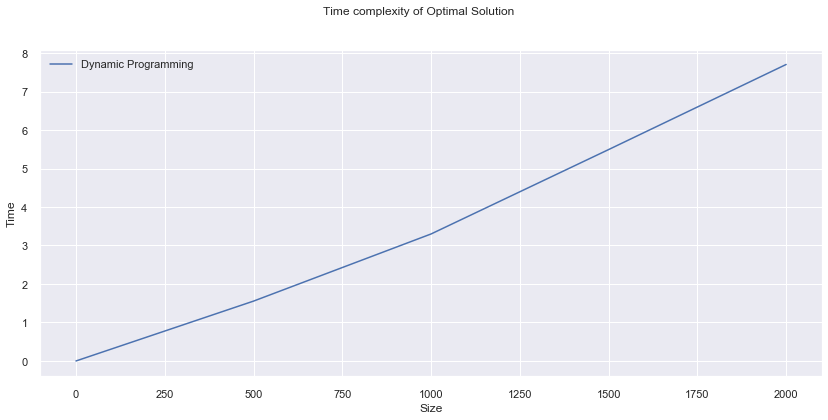

In [18]:
#Call BuildItem -> Change data from DataFrame to Object in a list
list_data = buildItems(df_dp)

#Measure time to carry out Optimal Solution using dynamic programming 
sizes = range(0, 2500, 500)
dynamic_time = np.zeros(len(sizes))
for i,n in enumerate(sizes):
    dynamic_time[i] = measureTime(list_data, n)
    
    
#Plot Time taken to run Dynamic Programming with respect to change in size
plt.figure(figsize =(14,6))
plt.plot(sizes, dynamic_time, label = 'Dynamic Programming')
plt.xlabel('Size')
plt.ylabel('Time')
plt.legend(loc='upper left')
plt.suptitle("Time complexity of Optimal Solution")
plt.show()

In [19]:
#Sort and Greedy Algorithm function
def npSort(item):
    return np.sort(item)

def greedy(data, constraint):
    combo = []
    total_price = 0
    for i in data:
        if total_price + i.getMinPrice() <= constraint:
            total_price += i.getMinPrice()
            combo.append(i)
    return combo


#Use Greedy Algorithm to select AirBNB list
list_data = npSort(list_data).tolist()
start_time = time.time()
greedy_selection = greedy(list_data, budget)
end_time = time.time()
time_greedy = end_time - start_time

In [20]:
#Randomly select airBNB list
start_time = time.time()
price = 0
random_selection = []
while price < budget:
    item = np.random.choice(list_data, p=df_dp['weighted_aval'].tolist())
    price += item.getMinPrice()
    random_selection.append(item)
end_time = time.time()
time_random_selection = end_time - start_time

In [21]:
#Print randomly selected airbnb list using Budger as Constraint 
for i in random_selection:
    print('\n Name:-', i.getName(), '\n Price:-', i.getPrice())


 Name:- Quiet/Modern Triplex loft, steps to prospect park! 
 Price:- 120

 Name:- colorful and huge 1BD near Prospect Park 
 Price:- 100

 Name:- 1 BR in loft / Bushwick 
 Price:- 30

 Name:- private modern room (long term 1 month or more) 
 Price:- 50

 Name:- Charming -One bedroom -Williamsburg 
 Price:- 100

 Name:- Private room in Brooklyn with laundry 
 Price:- 45

 Name:- Sunny Sunset Park Apt 
 Price:- 75

 Name:- Amazing 1BD in Harlem 
 Price:- 155

 Name:- Chic 2bed-2bath Manhattan Dream 
 Price:- 285


#### Print airbnb selected by greedy algorithm using Budget as constraint 

In [22]:
for i in greedy_selection:
    print('\n Name:-', i.getName(), '\n Price:-', i.getPrice())


 Name:- Cozy yet spacious private brownstone bedroom 
 Price:- 0

 Name:- Huge Brooklyn Brownstone Living, Close to it all. 
 Price:- 0

 Name:- ★Hostel Style Room | Ideal Traveling Buddies★ 
 Price:- 0

 Name:- Spacious comfortable master bedroom with nice view 
 Price:- 0

 Name:- Coliving in Brooklyn! Modern design / Shared room 
 Price:- 0

 Name:- Best Coliving space ever! Shared room. 
 Price:- 0

 Name:- IT'S SIMPLY CONVENIENT! 
 Price:- 10

 Name:- trip NYC - your Couch - clean, cheap, close to all 
 Price:- 15

 Name:- Tiny (but comfy!) Private room Manhattan 
 Price:- 20

 Name:- NYC room-cozy, basic, clean, cheap & close to all 
 Price:- 21

 Name:- Large Room in Queens 
 Price:- 30

 Name:- SemiPrivateLivingRoomTwinBed/MaimonidesLutheranHos 
 Price:- 33

 Name:- A happy home 
 Price:- 27

 Name:- Large Brooklyn Apartment. 
 Price:- 34

 Name:- 10 mins/Airports JFK/LGA/Hosp/malls bus/train#2 
 Price:- 35

 Name:- Ladies bedroom Bed 3 
 Price:- 36

 Name:- Ladies bedroom Bed

# 8. Simple Linear Regression
<a id="SLR"></a>

#### Linear regression to identify the drivers for price

time to run the code 0.012212038040161133
{'minimum_nights': -0.19510619403348192, 'number_of_reviews': -0.19962920044968363, 'calculated_host_listings_count': -0.03334753762685228, 'availability_365': 0.16729144759330544, 'neighbourhood_group_Bronx': -25.5912965793202, 'neighbourhood_group_Brooklyn': 10.77716123758925, 'neighbourhood_group_Manhattan': 58.197905216760674, 'neighbourhood_group_Queens': -8.955807442515722, 'neighbourhood_group_Staten Island': -34.42796243251405, 'room_type_Entire home/apt': 80.93452353976097, 'room_type_Private room': -24.265894712634942, 'room_type_Shared room': -56.66862882712601}
Intercept of the equation 72.60229720300775
0.07341194152832031


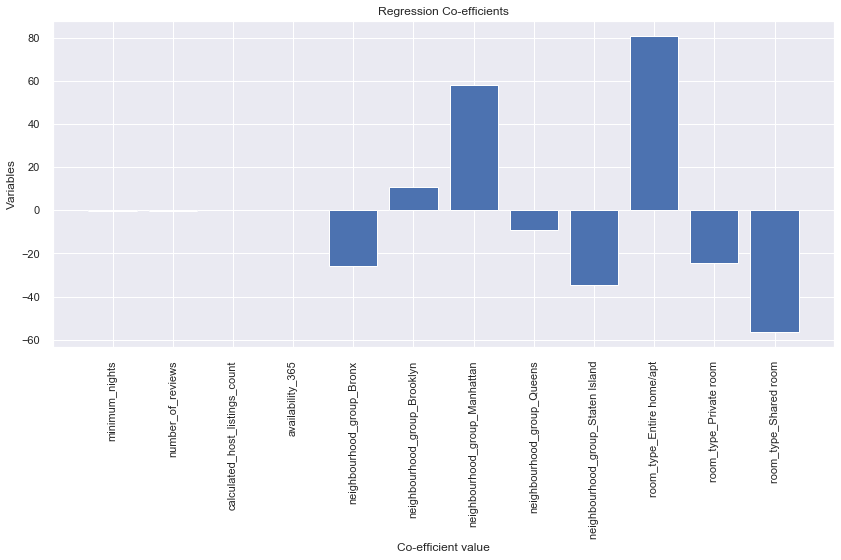

In [23]:
# data cleaning for regression
startTime=time.time()
df_reg = df.copy(deep = True)
df_reg = df_reg.drop(['id','latitude','longitude', 'name','neighbourhood','last_review'], axis=1)
df_reg = pd.get_dummies(df_reg, prefix=['neighbourhood_group','room_type'], columns =['neighbourhood_group','room_type'])

df_reg_nonna = df_reg.dropna()
Y = df_reg_nonna['price']

var = ['minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room']

X = df_reg_nonna[var]

import time

np_time_start = time.time()
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
np_time_end = time.time()

print ('time to run the code',np_time_end - np_time_start)

regression_result = {}
for i in range(len(var)):
    regression_result[var[i]] =  reg.coef_[i]
    
plt.figure(figsize =(14,6))
plt.bar(var,reg.coef_)
plt.title('Regression Co-efficients')
plt.xlabel('Co-efficient value')
plt.ylabel('Variables')
plt.xticks(rotation = 90)
print(regression_result)

print ('Intercept of the equation', reg.intercept_)


endTime=time.time()
time_linear_regression = endTime-startTime
print(endTime-startTime) #display time taken to plot


# 9. Web Scraping and Word Cloud Analysis
<a id="WC"></a>

#### Data srapped from the internet and then loaded it back to the notebook. Additionally, a word cloud chart is created to analyze the data.

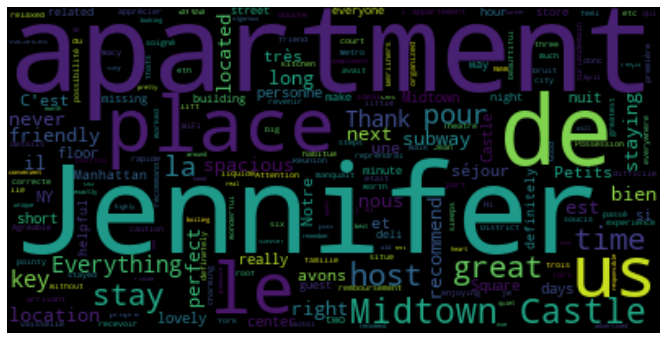

In [24]:
startTime=time.time()
import urllib
#read the file from web url
file_name, headers = urllib.request.urlretrieve("http://data.insideairbnb.com/united-states/ny/new-york-city/2019-08-06/data/reviews.csv.gz")

import gzip
import shutil
with gzip.open(file_name, 'rb') as f_in: #open the retreived file
    with open('reviews.csv', 'wb') as f_out: #create a new csv file 
        shutil.copyfileobj(f_in, f_out)

import pandas as pd
review_data = pd.read_csv('reviews.csv', nrows = 10) #create dataframe from the generated csv file

a_str = ''
for i in range(len(review_data)):
    a = review_data.comments[i]
    a_str += a   

# Start with one review:
#text = review_data.comments[0]
text = a_str

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize =(14,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

endTime=time.time()
time_wordcloud = endTime-startTime

# 10. Plotting time taken for each task
<a id="TC"></a>

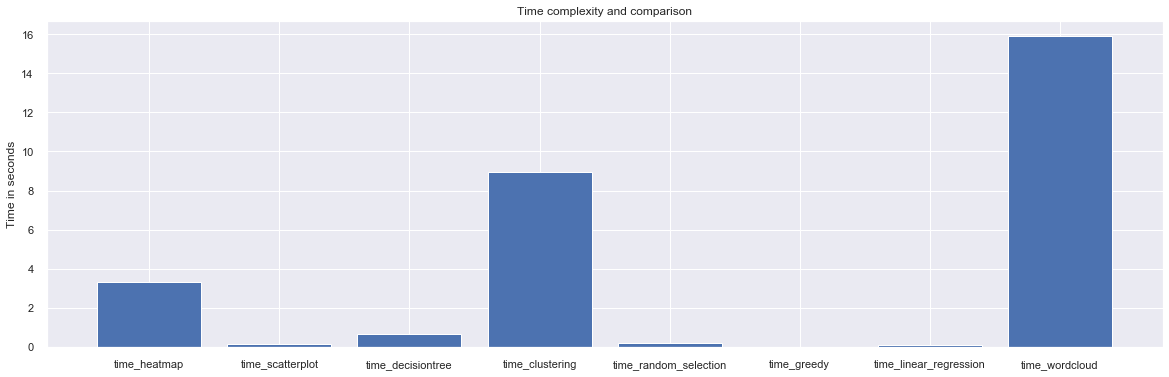

In [25]:
##Plotting time for each chart
time = [time_heatmap,time_scatterplot,time_decisiontree,time_clustering,time_random_selection,time_greedy,time_linear_regression,time_wordcloud]
X = [1,2,3,4,5,6,7,8]
labels = ['time_heatmap','time_scatterplot','time_decisiontree','time_clustering','time_random_selection','time_greedy','time_linear_regression', 'time_wordcloud']

plt.figure(figsize=(20,6))
plt.bar(X, time, align='center')
plt.xticks(X, labels)
plt.ylabel('Time in seconds')
plt.title('Time complexity and comparison')
plt.show()